# Practical Statistics for Data Scientists
## Chapter 2. Data and Sampling Distributions
The concepts we will discuss in this chapter is data and sampling distributions. Traditional statistics very much focused on using theory based on strong assumptions about the population. Modern statistics has moved to the sampling procedures, where such assumptions are not needed. In general, data scientists need not worry about the theoretical nature of population and instead should focus on the sampling procedures and the data at hand. There are some notable exceptions. Sometimes data is generated from a physical process that can be modeled. The simplest example is flipping a coin: this follows a binomial distribution. Any real-life binomial situation (buy or don’t buy, fraud or no fraud, click or don’t click) can be modeled effectively by a coin (with modified probability of landing heads, of course). In these cases, we can gain additional insight by using our understanding of the population.

## 1. Random Sampling:
**Sample:** A subset from a larger data set.

**Population:** The larger data set or idea of a data set.

**N(n):** The size of the population (sample).

**Random Sampling:** Random sampling is a part of the sampling technique in which each sample has an equal probability of being chosen.

**Stratified Random Sample:** Dividing the population into strata and randomly sampling from each strata. (Stratum or strata) - A homogeneous subgroup of a population with common characteristics.

**Simple Random Sample:** The sample that results from random sampling without stratifying the
population.

**Bias:** Systematic error.

**Sample Bias:** A sample that misrepresents the population.





## 2. Selection Bias: 
Selection bias refers to the practice of selectively choosing data—consciously or
unconsciously—in a way that leads to a conclusion that is misleading or ephemeral.

**Selection bias:** Bias resulting from the way in which observations are selected.

**Data snooping:** Extensive hunting through data in search of something interesting. (There is a saying among statisticians: “If you torture the data long enough, sooner or later it will confess.”) (That is why it is better to split the data in two parts- test_train_data)

**Vast search effect:** Bias or nonreproducibility resulting from repeated data modeling, or modeling
data with large numbers of predictor variables. Since repeated review of large data sets is a key value proposition in data science, selection bias is something to worry about. If you repeatedly run different models and ask different questions with a large data set, you are bound to find something
interesting. But is the result you found truly something interesting, or it the chance
outlier is deemed interesting. (To prevent this, it is better to split the data in two parts - test_train_data).

**Target Shuffling:** Target Shuffling is a process for testing the statistical accuracy of data mining results. It is particularly useful for identifying false positives, or when two events or variables occurring together are perceived to have a cause-and-effect relationship, as opposed to a coincidental one. The more variables you have, the easier it becomes to ‘oversearch’ and identify (false) patterns among them—called the ‘vast search effect’.
(Target Shuffling is the process of randomly permuting the values in one column of the input table. This will break any connection between input variables (learning columns) and response variable (target column) while retaining the overall distribution of the target variable. Target shuffling is used to estimate the baseline performance of a predictive model).

**Regression to the Mean:** Refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by one closer to the mean. Attaching special focus and meaning to the extreme value can lead to a form of selection bias.


## 3. Sampling Distribution of a Statistic:
The term sampling distribution of a statistic refers to the distribution of some sample statistic over many samples drawn from the same population. Typically, a sample is drawn with the goal of measuring something (with a sample statistic) or modeling something (with a statistical or machine learning model).

**Sample statistics:** A metric calculated for a sample of data drawn from a larger population.

**Data distribution:** The frequency distribution of individual values in a data set.

**Sampling distribution:** The frequency distribution of a sample statistic over many samples or resamples.

**Central limit theorem:** The means drawn from multiple samples from the data when plotted, it will resemble the bell-shaped normal curve. We can demonstrate this by taking the means of multiple samples of 5 or 20 items and plotting them on a bar chart.

**Standard error:** A key metric that sums up the variability of a sample statistic is its standard error. Do not confuse standard deviation (which measures the variability of individual data points) with standard error (which measures the variability of a sample metric).

Data = https://www.kaggle.com/c/nfl-big-data-bowl-2022/overview

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from IPython.display import Image

In [4]:
player_data = pd.read_csv("D:\Krishna\Coursera_IBM Data Science Certification Course\Data Science Books\Practical_Statistics_for_Data_Scientists\Chapter_2_Data_and_Sampling_Distributions\players.csv")
player_data

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [5]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


In [6]:
player_data.shape

(2732, 7)

In [7]:
player_data.isnull()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2727,False,False,False,False,False,False,False
2728,False,False,False,False,False,False,False
2729,False,False,False,False,False,False,False
2730,False,False,False,False,False,False,False


In [8]:
player_data.dtypes

nflId           int64
height         object
weight          int64
birthDate      object
collegeName    object
Position       object
displayName    object
dtype: object

In [9]:
player_data.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'Position',
       'displayName'],
      dtype='object')

In [10]:
player_data.describe()

,nflId,weight
count,2732.000000,2732.000000
mean,44268.173865,244.364568
std,4850.190569,46.707575
min,21213.000000,153.000000
25%,41444.750000,205.000000
50%,44870.500000,235.000000
75%,46972.500000,290.000000
max,53172.000000,380.000000


In [11]:
# Lets clean the data-height (foot to inches):

player_data["height_inches"] = player_data['height'].apply(lambda x:
                            int(x.split("-")[0])* 12 + int(x.split("-")[1])
                            if len(x.split("-")) == 2 else int(x))

player_data

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Text(0.5, 1.0, 'Central Limit Theorem')

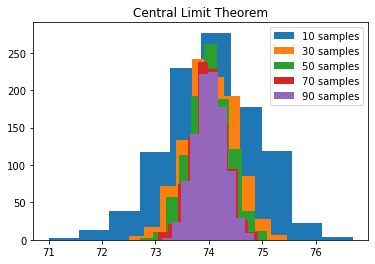

In [12]:
# Central limit theorem:

import numpy
import matplotlib.pyplot as plt
 
sample_amounts = range(10, 100, 20)   # number of sample

for x in sample_amounts:
    samples = []    # list of sample means
    for i in range(1000):                   # create a list of 1000 samples  
        samples.append(player_data['height_inches'].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + " samples" for z in sample_amounts])
plt.title("Central Limit Theorem")

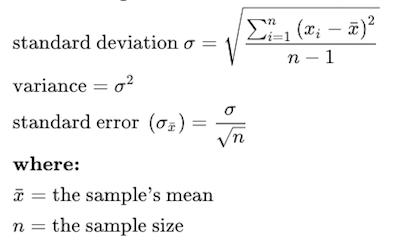

In [13]:
# Standard Error:

from IPython import display 
display.Image("http://statcalculators.com/wp-content/uploads/2020/03/calculating-standard-error-of-the-mean%E2%80%8B.png", width = 500)


In [14]:
SE = player_data['height_inches'].sem()
print("The value of standard error in the height(inches) of players is:\n", SE)

The value of standard error in the height(inches) of players is:
 0.05065243293253027


## 4. The Bootstrap
Bootstrapping is a type of resampling (repeated small samples are drawn with replacement over and over again) where large numbers of smaller samples of the same size are repeatedly drawn, with replacement, from a single original sample.

For example, let’s say your sample was made up of ten numbers: 49, 34, 21, 18, 10, 8, 6, 5, 2, 1. You randomly draw three numbers 5, 1, and 49. You then replace those numbers into the sample and draw three numbers again. Repeat the process of drawing x numbers B times. Usually, original samples are much larger than this simple example, and B can reach into the thousands. After a large number of iterations, the bootstrap statistics are compiled into a bootstrap distribution. You’re replacing your numbers back into the pot, so your resamples can have the same item repeated several times (e.g. 49 could appear a dozen times in a dozen resamples).

**Bootstrap sample:** A sample taken with replacement from an observed data set.

**Resampling:** The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:
1. Draw a sample value, record it, and then replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3; k times (k is the number of iterations). 
5. Use the k results to:
    - Calculate their standard deviation (this estimates sample mean standard error).
    - Produce a histogram or boxplot.
    - Find a confidence interval.

In [15]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):          # creates a new variable called nrepeat and sets its value to range(1000)
    sample = resample(player_data["height_inches"])    # the code uses resample() to create a sample from player_data["height_inches"]
    results.append(sample.mean())         # The results are then appended into an empty list called results
results = pd.Series(results)           # The results are then appended into an empty list called results
print("Boostrap Statistics:")
print(f'Original: {player_data["height_inches"].mean()}')
print(f'bias: {results.mean() - player_data["height_inches"].mean()}')
print(f'std. error: {results.std()}')

# The code first iterates through 1000 times, and then calculates the mean height for each iteration.
# The result is stored in a list called results.


Boostrap Statistics:
Original: 74.0106149341142
bias: 0.0009044655929244527
std. error: 0.05272087205741021


## 5. Confidence Intervals
It is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic. More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed).

Simplest way to understand CI definition; I found on this links >>
1. https://youtu.be/tFWsuO9f74o
2. https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (k) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the k resample results from
either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval

**Confidence level:** The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.

**Interval endpoints:** The top and bottom of the confidence interval.

***For a data scientist, a confidence interval is a tool that can be used to get an idea of how variable a sample result might be.***

In [16]:
# If we have fewer number of items in our sample then we can use t-distribution.

import numpy as np
import scipy.stats as st

# define sample data
data = player_data["height_inches"].sample(20)

# create 95% confidence level for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(73.72054035222195, 76.27945964777805)

In [17]:
# If we have fewer number of items in our sample then we can use >> t-distribution. 
# Otherwise, simply we can use >> Normal Distribution.

import numpy as np
import scipy.stats as st

# define sample data
np.random.seed(0)
data = player_data["height_inches"].sample(1500)

# create 95% confidence level for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(73.92590128473445, 74.19009871526556)

## 6. Normal/Guassian Distribution
The normal distribution model is motivated by the Central Limit Theorem. The Normal distribution or Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a *bell curve*. The normal distribution is the most common type of distribution assumed in technical stock market analysis and in other types of statistical analyses. The standard normal distribution has two parameters: the mean and the standard deviation. 

**Error:** The difference between a data point and a predicted or average value.

**Standardize:** Subtract the mean and divide by the standard deviation.

**z-score:** The result of standardizing an individual data point.
https://www.investopedia.com/terms/z/zscore.asp

**Standard normal:** A normal distribution with mean = 0 and standard deviation = 1.

**QQ-Plot:** A plot to visualize how close a sample distribution is to a specified distribution, e.g., the normal distribution. A QQ-Plot is used to visually determine how close a sample is to a specified distribution—in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

**Note:** 
- In a normal distribution the mean is zero and the standard deviation is 1. It has zero skew and a kurtosis of 3. The skewness and kurtosis coefficients measure how different a given distribution is from a normal distribution. 
- The skewness measures the symmetry of a distribution.
- The kurtosis statistic measures the thickness of the tail ends of a distribution in relation to the tails of the normal distribution.


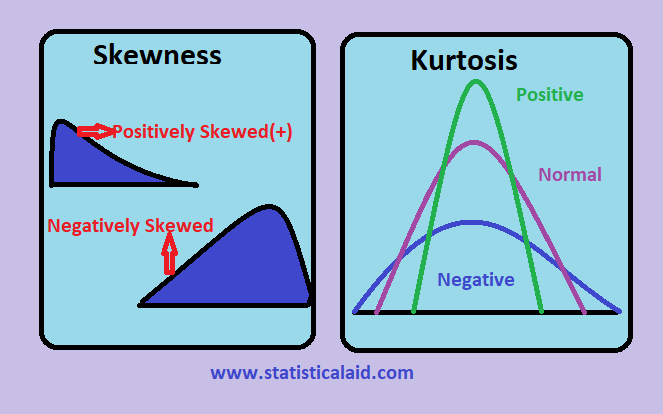

In [18]:
# skewness and kurtosis
from IPython import display 
display.Image("./skw.png", width = 600)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

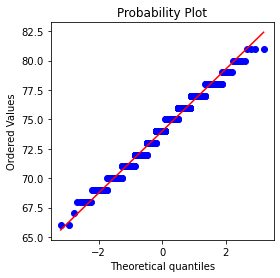

In [19]:
# QQ-Plot

from scipy import stats

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = player_data["height_inches"].sample(1000)
stats.probplot(norm_sample, plot=ax)

In [20]:
norm_sample

1540    70
2673    78
348     74
412     71
15      78
        ..
1761    75
2014    73
2475    76
1386    74
1326    72
Name: height_inches, Length: 1000, dtype: int64

## 7. Long-Tailed Distributions
The data are always not normally distributed. Sometimes, the distribution is highly skewed (asymmetric), such as with income data; or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a distribution correspond to the extreme values (small and large).

**Tail:** The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.
**Skew:** Where one tail of a distribution is longer than the other.

Example of Long-tailed distribution can be found on this website: Distribution of Household Income: 2014 (USA); Link - https://www.census.gov/library/visualizations/2015/demo/distribution-of-household-income--2014.html

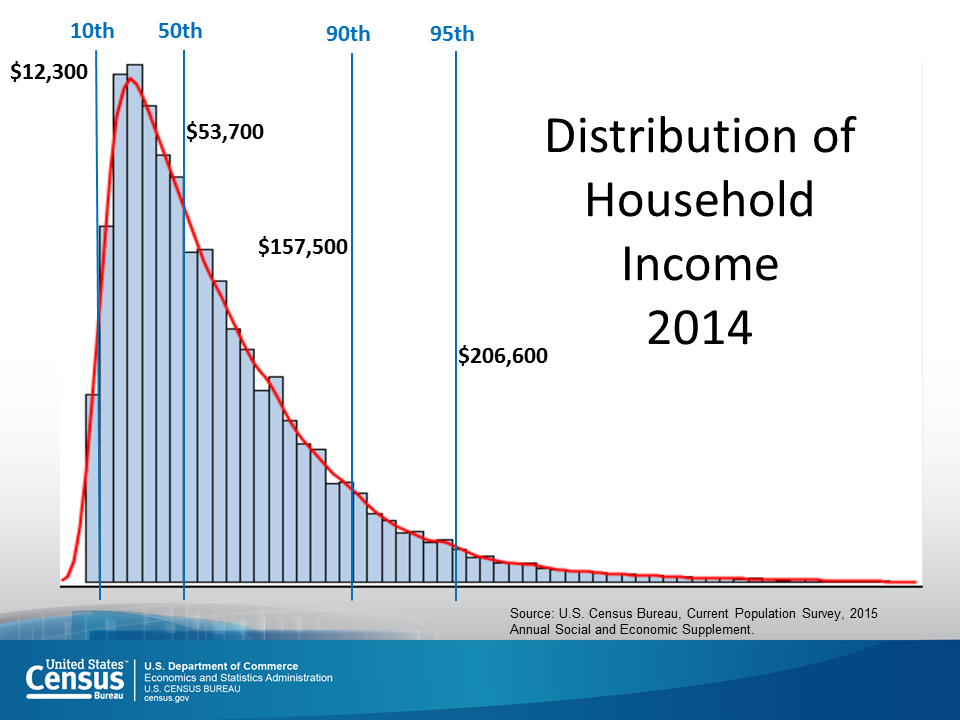

In [25]:
# Example of Long-tailed distribution: The plot has long tailed on the right side of plot (right skewed).
from IPython import display 
display.Image("https://www.census.gov/library/visualizations/2015/demo/distribution-of-household-income--2014/_jcr_content/root/responsivegrid/embeddableimage67.coreimg.png/1459361296671/hh-inc-dist.png", width = 600)

## 8. Student’s t-Distribution
The t-distribution is a normally shaped distribution, except that it is a bit thicker and longer on the tails. It is used extensively in depicting distributions of sample statistics. For large sample size, the t-distribution becomesthe more normally shaped. The t-distribution is actually a family of distributions resembling the normal distribution but with thicker tails. The t-distribution is widely used as a reference basis for the distribution of sample means, differences between two sample means, regression parameters, and more.


**Degrees of freedom:** A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and numbers of groups. Degrees of freedom refers to the number of independent observations in a set of data. When estimating a mean score or a proportion from a single sample, the number of independent observations is equal to the sample size minus one (n-1).


The t-distribution is often called Student’s t because it was published in 1908 in Biometrika by W. S. Gosset under the name “Student.” Gosset’s employer, the Guinness
brewery, did not want competitors to know that it was using statistical methods, so it insisted that Gosset not use his name on the article.

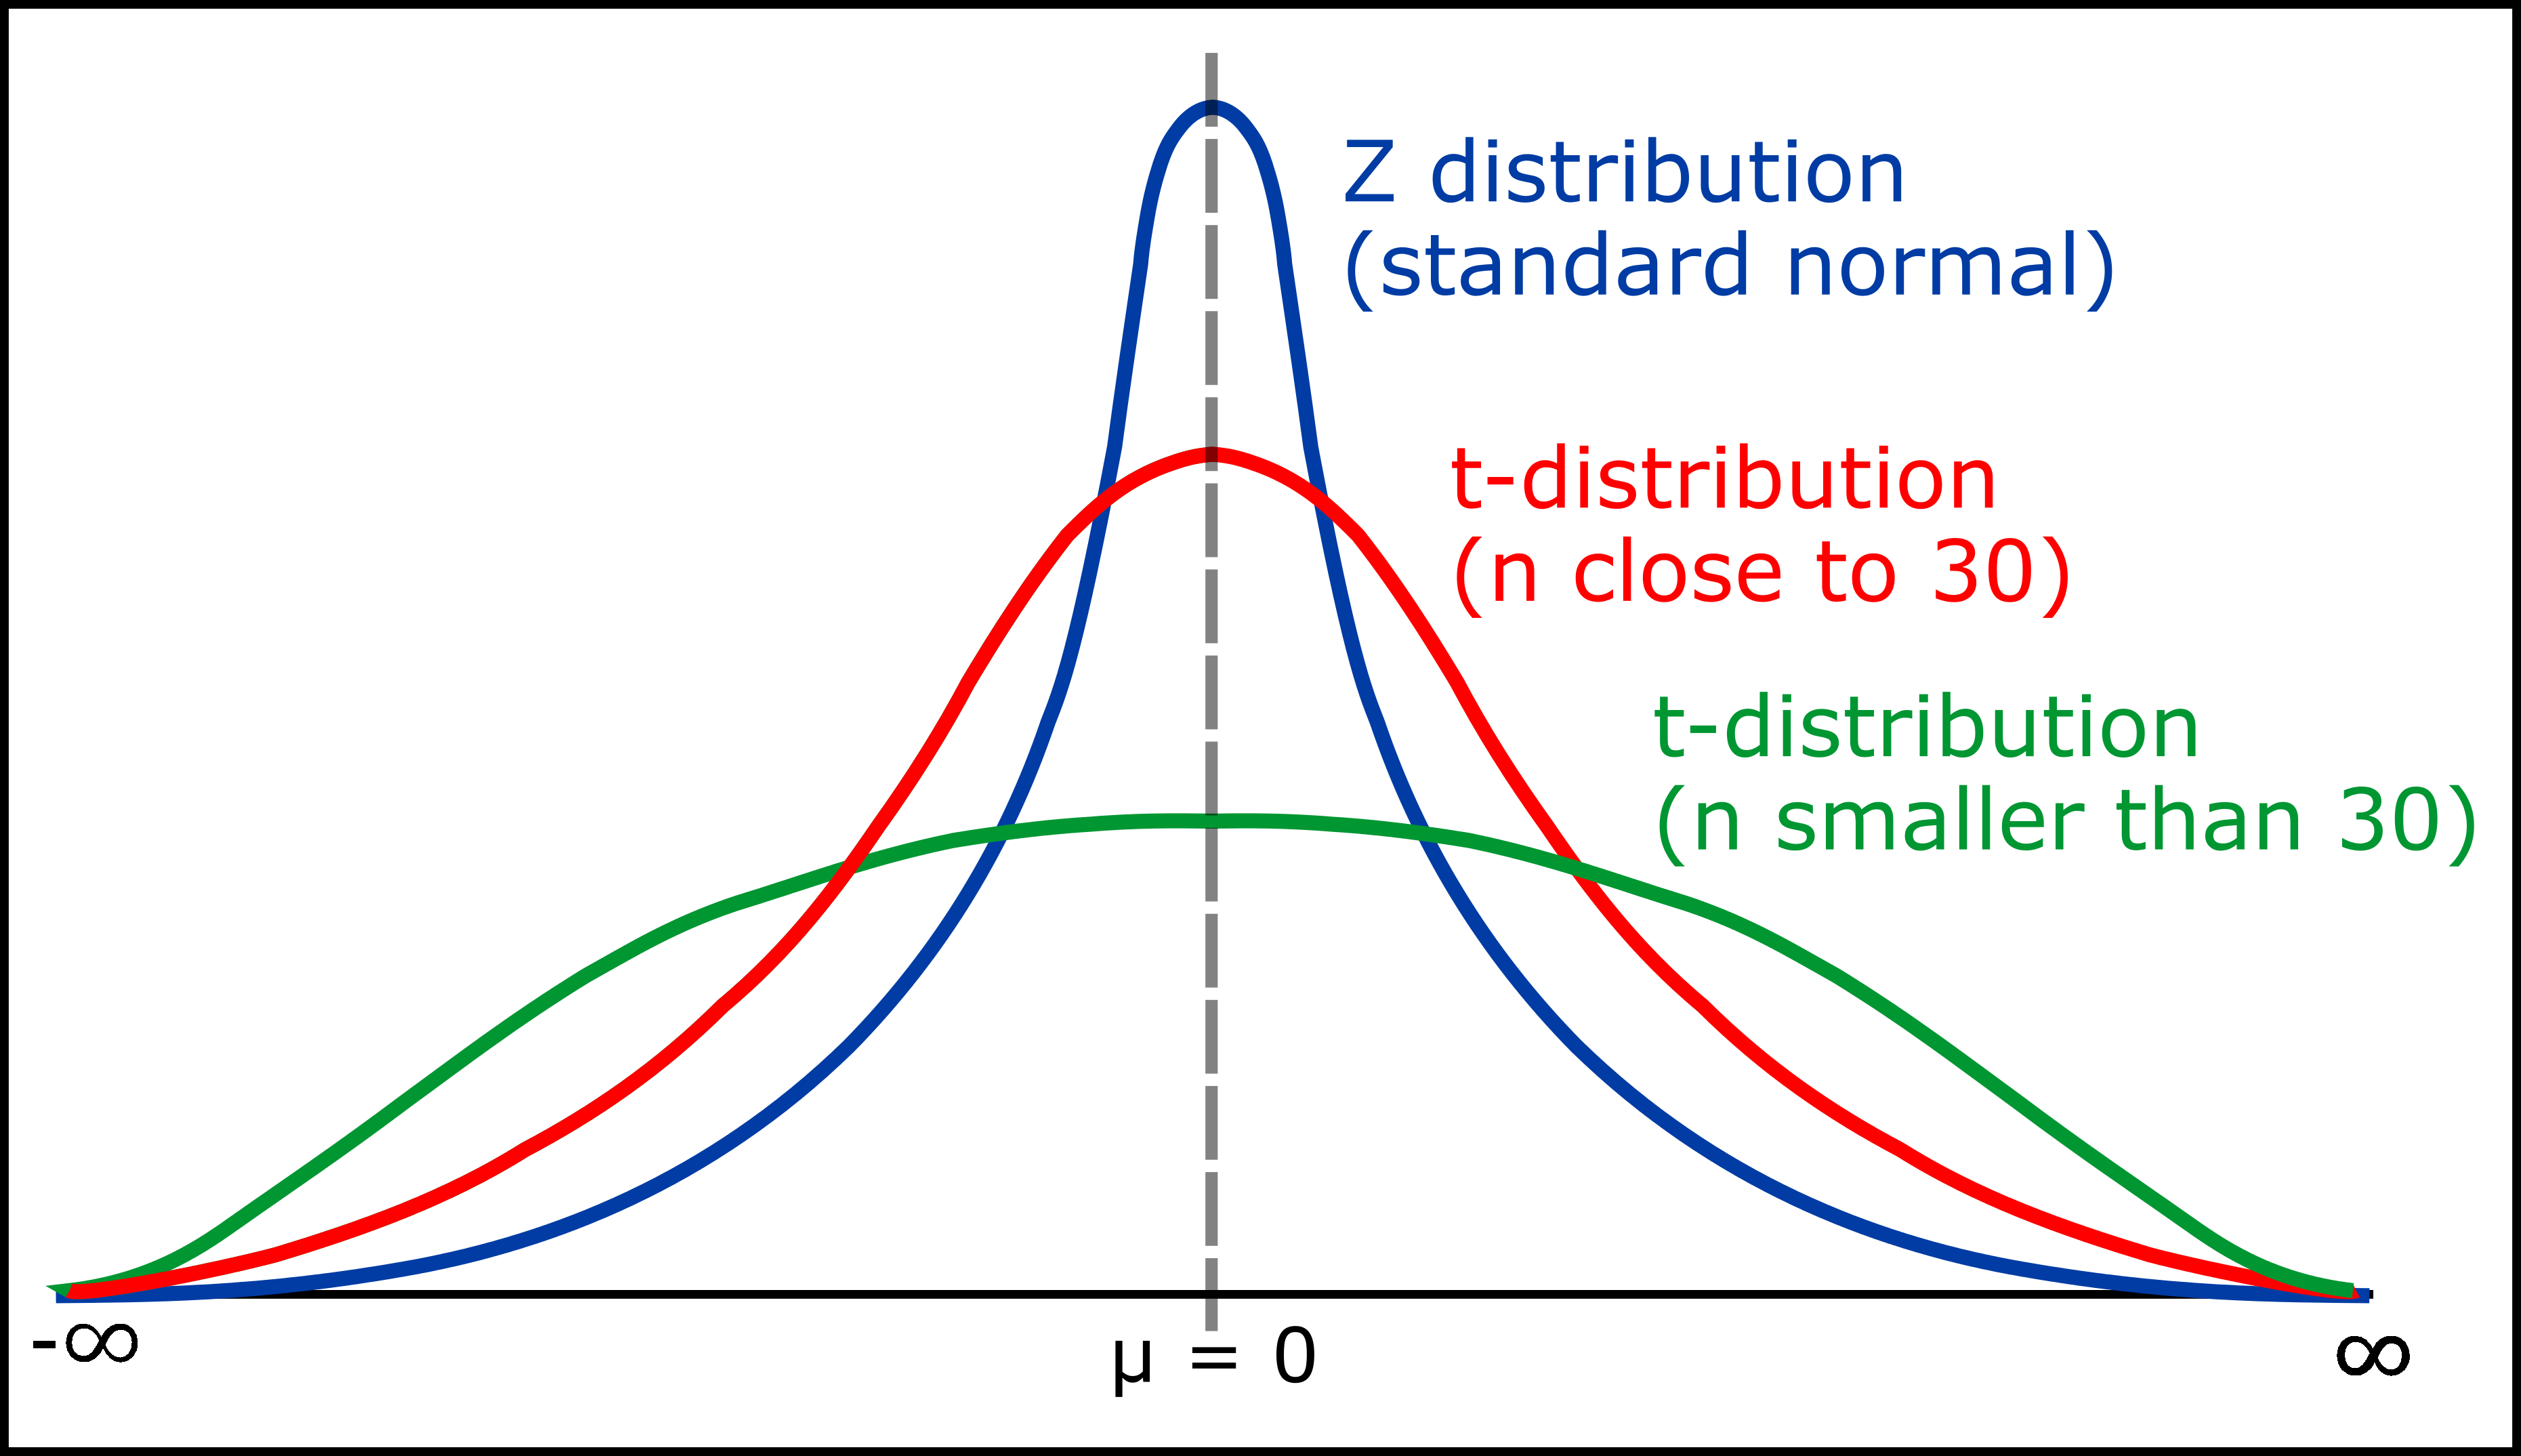

In [27]:
# Example of Student’s t-Distribution:
from IPython import display 
display.Image("https://media.geeksforgeeks.org/wp-content/uploads/20200525113955/f126.png", width = 600)

## 9.  Binomial Distribution 
#### (Binomial:Having two outcomes; Binomial distribution: Distribution of number of successes in x trials)
The binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with specified probability (p) of success in each trial. Central to understanding the binomial distribution is the idea of a set of trials, each trial having two possible outcomes with definite probabilities such as Yes/no, buy/don’t buy, click/don’t click, survive/die, and so on.
- For example, flipping a coin 10 times is a binomial experiment with 10 trials, each
trial having two possible outcomes (heads or tails).
- Such yes/no or 0/1 outcomes are termed binary outcomes, and they need not have 50/50 probabilities.
- The loan defaults or fraudulent transactions are relatively uncommon events that we
may be interested in predicting, so they are termed “1s” or “successes.”


## 9. Chi-Square Distribution
## 10. F-Distribution
#### (Will do this above topics in Chapter 3)

## 11. Poisson Distributions
The frequency distribution of the number of events in sampled units of time or space. Many processes produce events randomly at a given overall rate—visitors arriving at a website, or cars arriving at a toll plaza (events spread over time); imperfections in a square meter of fabric, or typos per 100 lines of code (events spread over space). The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units. It is useful when addressing queuing questions such as “How much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any fivesecond period?”

**Lambda:** The rate (per unit of time or space) at which events occur.

**Exponential Distribution:** The frequency distribution of the time or distance from one event to the next event.

**Weibull Distribution:** A generalized version of the exponential distribution in which the event rate is allowed to shift over time.

## Summary
1. In the era of big data, the principles of random sampling remain important when accurate estimates are needed.
2. Random selection of data can reduce bias and yield a higher quality data set than would result from just using the conveniently available data.
3. Knowledge of various sampling and data-generating distributions allows us to quantify potential errors in an estimate that might be due to random variation.
4. The bootstrap (sampling with replacement from an observed data set) is an attractive “one size fits all” method to determine possible error in sample estimates.